In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,jaccard_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [4]:
df=pd.read_csv('/content/heart .csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect









In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

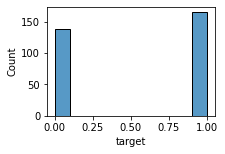

In [6]:
plt.figure(figsize=(3,2))
sns.histplot(data=df,x='target')
plt.show()

[]

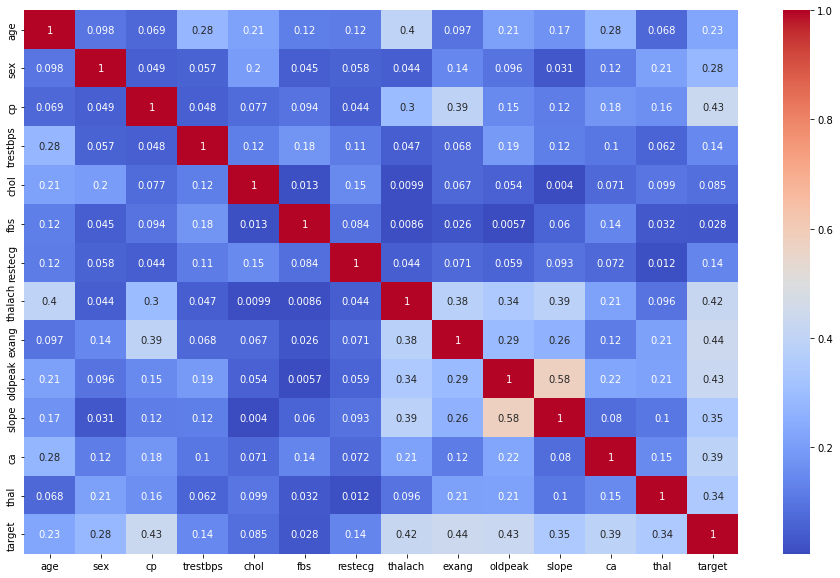

In [7]:
corrm=df.corr().abs()
plt.figure(figsize=(16,10))
sns.heatmap(corrm, cmap="coolwarm", annot=True)
plt.plot()

In [8]:
df.corrwith(df['target']).abs().sort_values(ascending=True)

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
dtype: float64

In [9]:
df=df.drop(['chol','fbs'],axis=1)

In [10]:
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


In [11]:
x=df.drop('target',axis=1)
y=df['target'].copy()

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [13]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [14]:
N,D=x_train.shape

In [39]:
model=Sequential([
                  Dense(units=16,input_shape=(D,),activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=2,activation='sigmoid')
                  
])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.fit(x=x_train,y=y_train,validation_split=0.2,batch_size=5,epochs=5,verbose=2)

Epoch 1/5
44/44 - 1s - loss: 0.8102 - accuracy: 0.4009 - val_loss: 0.7307 - val_accuracy: 0.3455 - 599ms/epoch - 14ms/step
Epoch 2/5
44/44 - 0s - loss: 0.6613 - accuracy: 0.6037 - val_loss: 0.6346 - val_accuracy: 0.7636 - 98ms/epoch - 2ms/step
Epoch 3/5
44/44 - 0s - loss: 0.5717 - accuracy: 0.7834 - val_loss: 0.5436 - val_accuracy: 0.7818 - 100ms/epoch - 2ms/step
Epoch 4/5
44/44 - 0s - loss: 0.4898 - accuracy: 0.8203 - val_loss: 0.4675 - val_accuracy: 0.8182 - 105ms/epoch - 2ms/step
Epoch 5/5
44/44 - 0s - loss: 0.4233 - accuracy: 0.8387 - val_loss: 0.4109 - val_accuracy: 0.8364 - 105ms/epoch - 2ms/step


In [43]:
prediction=model.predict(x_test,batch_size=10,verbose=0)
pd.DataFrame(prediction*100)

,0,1
0,58.156956,38.260998
1,35.236507,53.552967
2,32.040459,51.427341
3,71.839149,20.529274
4,35.507748,71.408279
5,33.409107,57.659912
6,30.306751,65.910736
7,87.250885,7.183191
8,77.806946,22.982973
9,50.340153,35.198273


In [44]:
rounded_y=np.argmax(prediction,axis=1)

In [45]:
for i in rounded_y:
  print(i)

0
1
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
0
0
0
1
0
0
1
1
1
1
1
0
1
0


In [46]:
print(confusion_matrix(y_true=y_test,y_pred=rounded_y))
print(classification_report(y_test,rounded_y))

[[10  4]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.78      0.82      0.80        17

    accuracy                           0.77        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.77      0.77      0.77        31

